In [4]:
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

C:\Users\Remo\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [0]:
titanic_df = pd.read_csv("https://raw.githubusercontent.com/ID2223KTH/id2223kth.github.io/master/assignments/lab1/titanic.csv")
display(titanic_df)

In [76]:
# Drop unnecessary columns
df = titanic_df.drop(columns=['Fare','Cabin','Embarked','Name','Parch','Ticket','SibSp'])

# Make gender numeric? (could be categorical)
df['Sex'] = df['Sex'].replace(['male', 'female'], [0, 1])

# Interpolate missing Age values
#df['Age'] = df['Age'].interpolate()
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Bin the age data and create indexes
df['Age'] = pd.cut(x=df['Age'], bins=[0,20,50,75,100], labels=False)
#display(df)

In [77]:
y = df['Survived']
X = df.drop(columns=['Survived'])

display(y)
display(X)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

,PassengerId,Pclass,Sex,Age
0,1,3,0,1
1,2,1,1,1
2,3,3,1,1
3,4,1,1,1
4,5,3,0,1
...,...,...,...,...
886,887,2,0,1
887,888,1,1,0
888,889,3,1,1
889,890,1,0,1


In [78]:
# You can read training data, randomly split into train/test sets of features (X) and labels (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# In general, a small learning rate and large number of estimators = more accurate XGBoost models
# Reference for tuning: https://www.kaggle.com/code/alexisbcook/xgboost?scriptVersionId=79127842&cellId=9
# Train our model with the XGBoost algorithm using our features (X_train) and labels (y_train)
#model = XGBClassifier(n_estimators=500, learning_rate=0.4)
#model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=50, eval_set=[(X_test, y_test)], verbose=False)

model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train.values.ravel())

RandomForestClassifier(n_estimators=1000)

In [79]:
# Evaluate model performance using the features from the test set (X_test)
y_pred = model.predict(X_test)

# Compare predictions (y_pred) with the labels in the test setx (y_test)
metrics = classification_report(y_test, y_pred, output_dict=True)
results = confusion_matrix(y_test, y_pred)
display(results)
#display(metrics)

# interpolate 90, 22, 24, 43; accuracy 0.7430167597765364
# median/mean/mode 91, 21, 21, 46; accuracy 0.7653631284916201

array([[91, 21],
       [21, 46]], dtype=int64)

0.7653631284916201

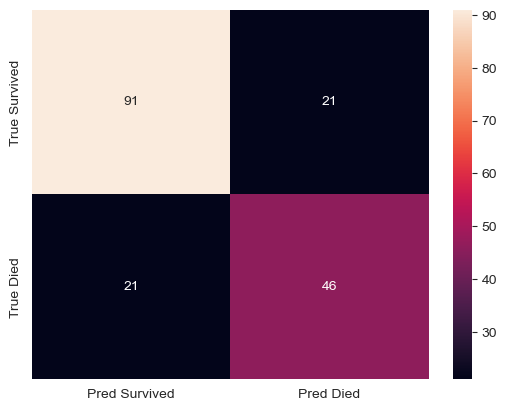

In [80]:
# Create the confusion matrix as a figure, we will later store it as a PNG image file
df_cm = pd.DataFrame(results, ['True Survived', 'True Died'],
                     ['Pred Survived', 'Pred Died'])
cm = sns.heatmap(df_cm, annot=True)
fig = cm.get_figure()
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)

#display(predictions)
display(accuracy)